# TSF TASK 5 (IPL Sports data analysis)

In [3]:
#importing required module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the data
delivery=pd.read_csv("deliveries.csv")

In [4]:
pd.set_option("display.max_columns",None)
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [13]:
delivery.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [21]:
#duplicates data removing
duplicate=delivery.duplicated().sum()

delivery=delivery.drop(duplicate)

In [22]:
#number of seasons
delivery['batting_team'].unique() 

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [23]:
#number of match played by each team
delivery.batting_team.value_counts() 

Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12907
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1909
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

In [38]:
#how many batsman are there
print("total batsman :" ,delivery.batsman.nunique())
#how many bowler are there
print("total bowler:",delivery.bowler.nunique())

total batsman : 516
total bowler: 405


<AxesSubplot:xlabel='batsman'>

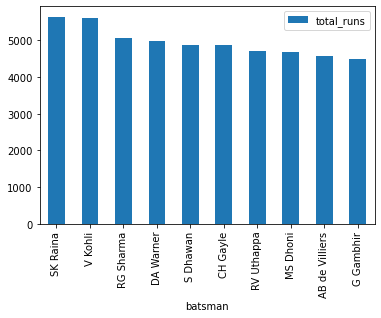

In [40]:
#top 10 batsman 
top_batsman=delivery.groupby('batsman')['total_runs'].agg('sum').reset_index().sort_values('total_runs', ascending=False).head(10)
top_batsman.set_index('batsman', inplace=True)
top_batsman.plot(kind='bar')

In [59]:
#top 10 bowler who has given maximum run
delivery.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values('total_runs', ascending=False).head(10)

,bowler,total_runs
264,PP Chawla,4153
126,Harbhajan Singh,4050
7,A Mishra,3850
93,DJ Bravo,3733
381,UT Yadav,3640
340,SL Malinga,3511
269,R Ashwin,3391
251,P Kumar,3342
53,B Kumar,3264
282,RA Jadeja,3221


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'bowled'),
  Text(2, 0, 'run out'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'caught and bowled'),
  Text(5, 0, 'stumped'),
  Text(6, 0, 'retired hurt'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

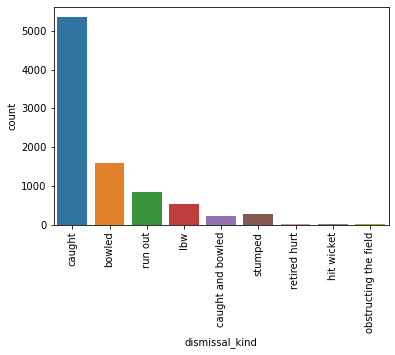

In [60]:
#dismissal kind 
sns.countplot('dismissal_kind', data=delivery)
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='batting_team'>

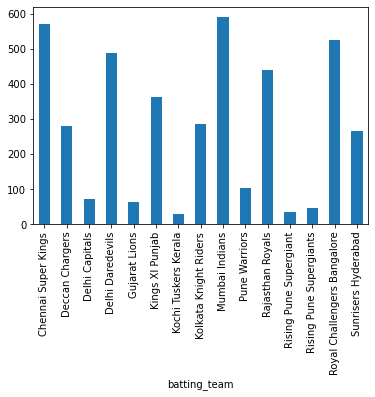

In [61]:
#performance of any bowler in each team
mask=delivery['bowler']=='PP Chawla'
delivery[mask].groupby('batting_team')['total_runs'].agg('sum').plot(kind='bar')

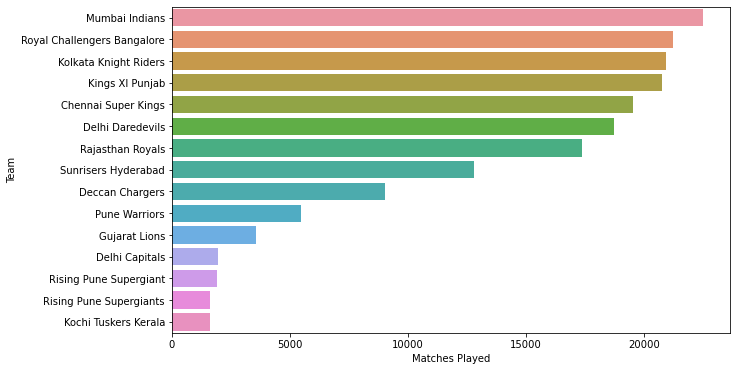

In [65]:
#matches played by each team
plt.figure(figsize=(10,6))
data = delivery['bowling_team'].value_counts()
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.show() 

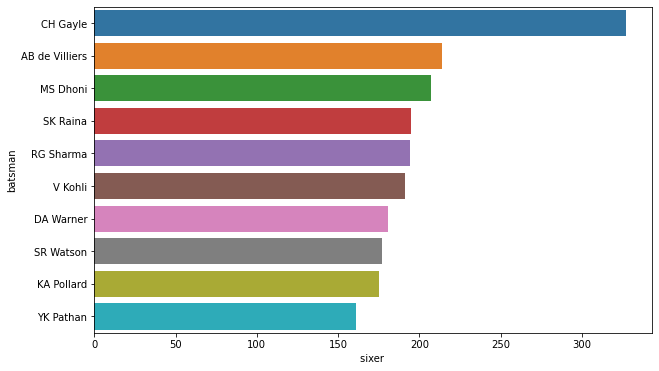

In [72]:
# top 10 batsman with no of sixes hit 
plt.figure(figsize=(10,6))
data = delivery[delivery['batsman_runs'] == 6].groupby('batsman').count()['match_id'].sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('sixer')
plt.ylabel('batsman')
plt.show()

In [75]:
# top 10 bowler and runs given by noball
delivery[delivery['noball_runs'] != 0]['bowler'].value_counts()[:10]

S Sreesanth    23
JJ Bumrah      22
I Sharma       21
A Mishra       20
SL Malinga     18
UT Yadav       18
AB Dinda       14
SR Watson      13
RP Singh       13
JA Morkel      13
Name: bowler, dtype: int64

In [77]:
#wide runs got by each team
delivery.groupby(['batting_team'])['wide_runs'].agg('sum').sort_values(ascending=False)


batting_team
Mumbai Indians                 948
Kolkata Knight Riders          852
Kings XI Punjab                728
Royal Challengers Bangalore    725
Chennai Super Kings            716
Delhi Daredevils               716
Rajasthan Royals               601
Sunrisers Hyderabad            456
Deccan Chargers                279
Pune Warriors                  169
Gujarat Lions                  134
Kochi Tuskers Kerala            89
Rising Pune Supergiants         60
Rising Pune Supergiant          58
Delhi Capitals                  45
Name: wide_runs, dtype: int64

In [4]:
#another data set loading
match=pd.read_csv("matches.csv")
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
#no. of seasons
match['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [20]:
#details of team which win by max wicket
match.iloc[match['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

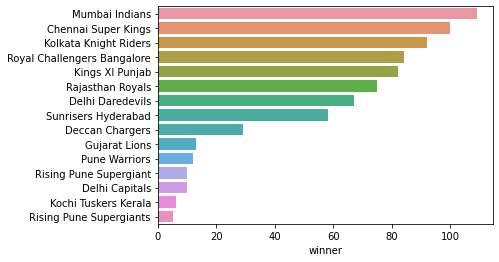

In [22]:
#winners 
data = match.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

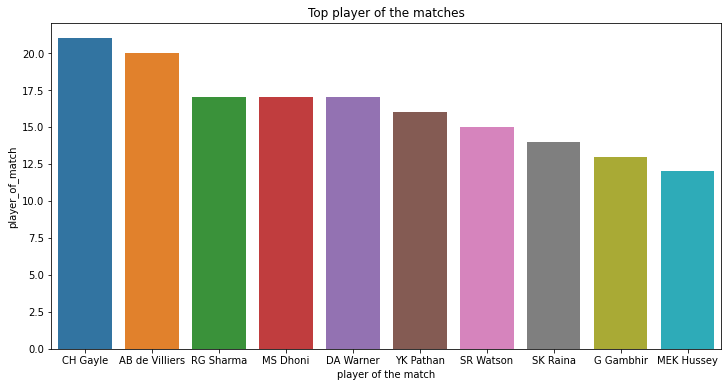

In [33]:
#top 10 player
plt.figure(figsize=(12,6))
top_players = match.player_of_match.value_counts()[:10]
plt.xlabel("player of the match")
plt.ylabel("count")
plt.title("Top player of the matches")
sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.show()

In [47]:
#toss winner team
match.groupby("toss_winner")["winner"].count()

toss_winner
Chennai Super Kings            89
Deccan Chargers                43
Delhi Capitals                 10
Delhi Daredevils               79
Gujarat Lions                  15
Kings XI Punjab                81
Kochi Tuskers Kerala            8
Kolkata Knight Riders          92
Mumbai Indians                 98
Pune Warriors                  20
Rajasthan Royals               78
Rising Pune Supergiant          6
Rising Pune Supergiants         7
Royal Challengers Bangalore    80
Sunrisers Hyderabad            46
Name: winner, dtype: int64

In [99]:
#match won by maximum run
match.win_by_runs.max()
match[match["win_by_runs"]==match.win_by_runs.max()]["winner"]

43    Mumbai Indians
Name: winner, dtype: object

In [100]:
#match won by highest wicket
match.win_by_wickets.max()
match[match["win_by_wickets"]==match.win_by_wickets.max()]["winner"]

2            Kolkata Knight Riders
34                 Kings XI Punjab
71                 Deccan Chargers
119               Delhi Daredevils
183    Royal Challengers Bangalore
298               Rajasthan Royals
376                 Mumbai Indians
390            Chennai Super Kings
542    Royal Challengers Bangalore
590            Sunrisers Hyderabad
683    Royal Challengers Bangalore
Name: winner, dtype: object

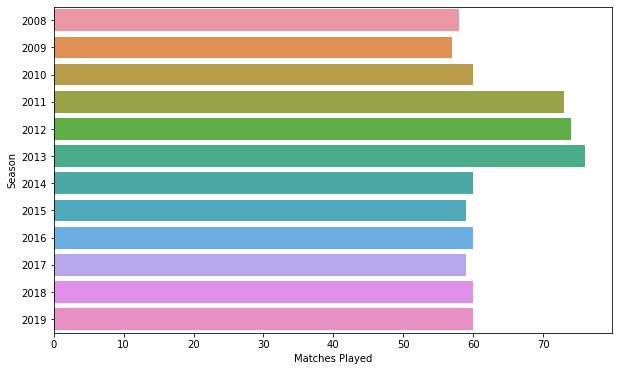

In [78]:
#matche played season wise
plt.figure(figsize=(10,6))
data = match.groupby(['id','season']).count().index.droplevel(level=0).value_counts().sort_index()
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

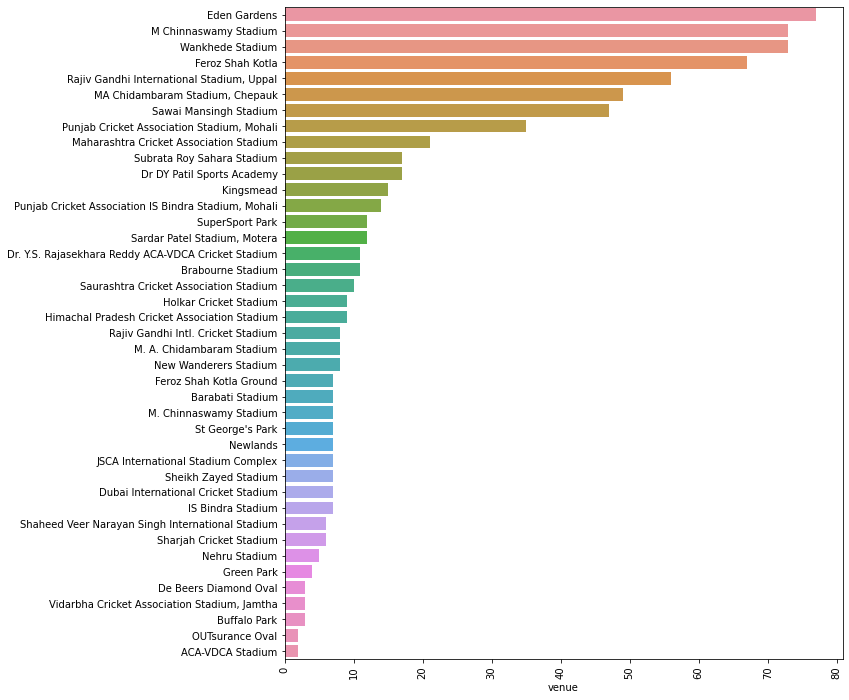

In [90]:
#most ipl match played in venue
plt.figure(figsize=(10,12))
data= match.venue.value_counts()
sns.barplot(y = data.index, x = data, orient='h');
plt.xticks(rotation='vertical')

<AxesSubplot:>

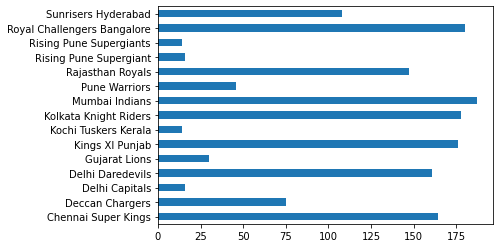

In [91]:
#Matches Played by Each Team
x = match['team1'].value_counts()
y = match['team2'].value_counts()
(x+y).plot(kind='barh')

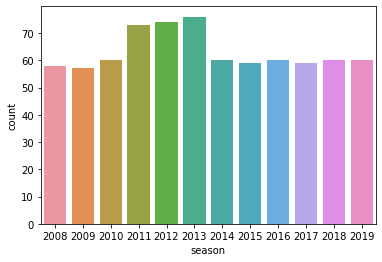

In [102]:
#season with ost played matches
sns.countplot(x='season', data=match)
plt.show()

In [106]:
#season wise match winners
match.groupby("season")["winner"].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64